In [1]:
# Sample API
import flowx
flowx.__version__

'0.1.dev'

In [2]:
# Define grid parameters
nx, ny = 40, 40
xmin, xmax = 0.0, 1.0
ymin, ymax = 0.0, 1.0

Re   = 100.0
dt   = 0.01
tmax = 2.

# Define cell-centered variable names
center_vars = ['pres', 'divv', 'asol', 'eror']
face_vars   = ['velc', 'hvar', 'asol', 'eror']

# Define boundary conditions for variable pressure and velocity [left, right, bottom, top]
bc_type_pres = {'pres': ['neumann', 'neumann', 'neumann', 'neumann']}
bc_val_pres  = {'pres': [0.0, 0.0, 0.0, 0.0]}

bc_type_u = {'velc': ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet']}
bc_val_u  = {'velc': [0.0, 0.0, 0.0, 1.0]}

bc_type_v = {'velc': ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet']}
bc_val_v  = {'velc': [0.0, 0.0, 0.0, 0.0]}

# Create the grid and data
gridc = flowx.Grid('cell-centered', center_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_pres, user_bc_val=bc_val_pres)

gridx = flowx.Grid('x-face', face_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_u, user_bc_val=bc_val_u)

gridy = flowx.Grid('y-face', face_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_v, user_bc_val=bc_val_v)

scalars = flowx.Scalars(tmax=2.0, dt=0.01, Re=100.0)

In [3]:
ins_vars = ['velc', 'hvar', 'divv', 'pres']

poisson_options = dict(maxiter = 2000, tol = 1e-9)
poisson_options['lu'], poisson_options['mtx'] = flowx.poisson.build_sparse(gridc, 'pres')

# AB2 starter
# Predictor Step
flowx.ins.advance_euler(gridc, gridx, gridy, scalars, ins_vars, 'predictor')

# Divergence Step
flowx.ins.advance_euler(gridc, gridx, gridy, scalars, ins_vars, 'divergence')

# Solve the pressure Poisson equation 
scalars.stats['ites'], scalars.stats['res'] = flowx.poisson.solve_lu(gridc, 'pres', 'divv', poisson_options)

# Corrector Step
flowx.ins.advance_euler(gridc, gridx, gridy, scalars, ins_vars, 'corrector')

scalars.advance()

while scalars.variable['time'] <= scalars.variable['tmax']:
    
    # Predictor Step
    flowx.ins.ab2(gridc, gridx, gridy, scalars, ins_vars, 'predictor')

    # Divergence Step
    flowx.ins.ab2(gridc, gridx, gridy, scalars, ins_vars, 'divergence')
    
    # Solve the pressure Poisson equation 
    scalars.stats['ites'], scalars.stats['res'] = flowx.poisson.solve_lu(gridc, 'pres', 'divv', 
                                                                             poisson_options)
    
    # Corrector Step
    flowx.ins.ab2(gridc, gridx, gridy, scalars, ins_vars, 'corrector')
    
    # Display stats
    if scalars.variable['nstep'] % 10 == 0:
        flowx.io.display_stats(scalars)   

    scalars.advance()

------------ Time = 0.09999999999999999 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.1886939268708156e-12
Max, Min, U   : 2.0, -0.13556612723659098
Max, Min, V   : 0.30953483763436196, -0.3203867935618168
Max, Min, P   : 1.17737471549437, -0.8832235589292571
Max, Min, DIV : 8.881784197001252e-15, -5.773159728050814e-15


------------ Time = 0.20000000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.07557787072121e-12
Max, Min, U   : 2.0, -0.22687787199964624
Max, Min, V   : 0.339512917894953, -0.43890547440428745
Max, Min, P   : 1.1724431285719716, -0.7974570794497942
Max, Min, DIV : 5.329070518200751e-15, -4.884981308350689e-15


------------ Time = 0.3000000000000001 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.1680158593347642e-12
Max, Min, U   : 2.0, -1.7373665161841716
Max, Min, V   : 1.3158245937798916, -1.8957406367738618
Max, Min, P   : 1.1353973621475308, -0.781

/home/jovyan/MAE-6225/flowx/ins/operators.py:66: RuntimeWarning: overflow encountered in square
  F = - (((u_P + u_E)**2 - (u_W + u_P)**2) / (4 * dx) +
/home/jovyan/MAE-6225/flowx/ins/operators.py:66: RuntimeWarning: invalid value encountered in subtract
  F = - (((u_P + u_E)**2 - (u_W + u_P)**2) / (4 * dx) +
/home/jovyan/MAE-6225/flowx/ins/operators.py:67: RuntimeWarning: overflow encountered in multiply
  ((u_P + u_N) * (v_nw + v_ne) -
/home/jovyan/MAE-6225/flowx/ins/operators.py:68: RuntimeWarning: overflow encountered in multiply
  (u_S + u_P) * (v_sw + v_se)) / (4 * dy))
/home/jovyan/MAE-6225/flowx/ins/operators.py:68: RuntimeWarning: invalid value encountered in subtract
  (u_S + u_P) * (v_sw + v_se)) / (4 * dy))
/home/jovyan/MAE-6225/flowx/ins/operators.py:105: RuntimeWarning: overflow encountered in multiply
  F = -(((u_se + u_ne) * (v_P + v_E) -
/home/jovyan/MAE-6225/flowx/ins/operators.py:106: RuntimeWarning: overflow encountered in multiply
  (u_sw + u_nw) * (v_W + v_P)) / (

/opt/conda/lib/python3.7/site-packages/matplotlib/contour.py:1520: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/opt/conda/lib/python3.7/site-packages/matplotlib/contour.py:1521: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/opt/conda/lib/python3.7/site-packages/matplotlib/contour.py:1169: RuntimeWarning: invalid value encountered in less
  under = np.nonzero(lev < self.zmin)[0]
/opt/conda/lib/python3.7/site-packages/matplotlib/contour.py:1171: RuntimeWarning: invalid value encountered in greater
  over = np.nonzero(lev > self.zmax)[0]


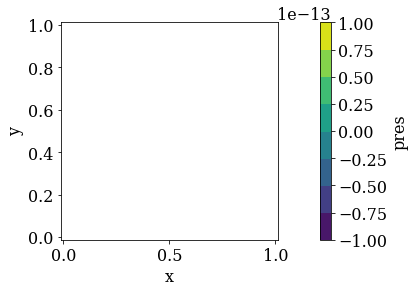

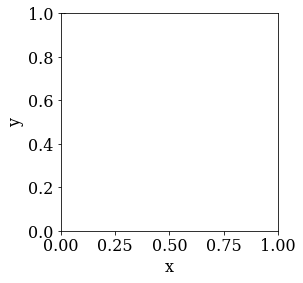

In [4]:
flowx.io.plot_contour(gridc, 'pres')
flowx.io.plot_vector(gridx, gridy,'velc')